In [1]:
!pip install uk-covid19 --quiet

from uk_covid19 import Cov19API

import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

You should consider upgrading via the 'c:\users\kalju\anaconda3\python.exe -m pip install --upgrade pip' command.


## UK Covid Impact on Sales and Closures

### Objective

The purpose of the notebook is to do ad-hoc correlation analysis between Nandos sales vs a set of UK covid metrics and find out correlation that could be useful for getting insights onto closures and sales impact

### Approach

#### Data Prep (separate Notebook)
* **1. Ingest data** - get UK Covid data from one of the sources below
* **2. Clean data** - clean data - remove empty columns and rows containging NaNs
* **3. Merge data sets** - merge UK Covid data with Nandos (i) sales, (ii) closure data (closure can be indicated as sales below a certain treshold

####  Modelling (this Notebook)
* **4. Correlations** - compute and visualise correlation matrix
* **5. Pairwise correlations** - compute and visualise correlation matrix

### Resources
- [UK Covid Download](https://coronavirus.data.gov.uk/details/download) - limited to 5 metrics only, hard to automate, not fit for purpose
- [UK Covid API](https://coronavirus.data.gov.uk/details/developers-guide) - JSON API (maybe richer than SDK below)
- [UK Covid Python SDK](https://publichealthengland.github.io/coronavirus-dashboard-api-python-sdk) - Python SDK wrapper around JSON API
- [Interactive Map](https://coronavirus.data.gov.uk/details/interactive-map) - could be potentially used for inspiration for visualisation

### Metrics
- [UK Covid Metrics](https://coronavirus.data.gov.uk/details/developers-guide#structure-metrics) - partial lists, documentation not well maintained
- **Cumulative vs Incremental** - we will use metrics tagged with *new* (incremental) rather than *cum* (cumulative), as sales / closures are measured on incremental, not on cumulative basis



## 1. Read in pre-processed data

In [4]:
sales_path = 'nandos_london_sales_covid.csv'
sales_df = pd.read_csv(sales_path)
sales_df.head()

,date,sales,newCasesByPublishDate,newDeaths28DaysByPublishDate,newDeathsByDeathDate
0,2021-01-20,12311.05,6190,272,59
1,2021-01-19,11581.10,6237,200,120
2,2021-01-18,9334.36,7051,129,174
3,2021-01-17,13636.65,9995,123,167
4,2021-01-16,15782.27,8838,211,161


In [5]:
mobility_path = 'london_mobility.csv'
mobility_df = pd.read_csv(mobility_path)
mobility_df.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,GB,United Kingdom,Greater London,NaN,NaN,NaN,NaN,15/02/2020,-11.0,-8.0,-34.0,-10,-3.0,2.0
1,GB,United Kingdom,Greater London,NaN,NaN,NaN,NaN,16/02/2020,-9.0,-11.0,-41.0,-9,-4.0,1.0
2,GB,United Kingdom,Greater London,NaN,NaN,NaN,NaN,17/02/2020,11.0,4.0,28.0,-3,-13.0,2.0
3,GB,United Kingdom,Greater London,NaN,NaN,NaN,NaN,18/02/2020,4.0,-2.0,11.0,-4,-13.0,2.0
4,GB,United Kingdom,Greater London,NaN,NaN,NaN,NaN,19/02/2020,3.0,-3.0,3.0,-5,-13.0,3.0


In [6]:
sales_mob = 'nandos_london_sales_covid_mobility.csv'
sm_df = pd.read_csv(sales_mob)
sm_df.head()

,date,sales,newCasesByPublishDate,newDeaths28DaysByPublishDate,newDeathsByDeathDate,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
0,20/01/2021,12311.05,6190,272,59,-73,-33,-41,-72,-63,27
1,19/01/2021,11581.10,6237,200,120,-70,-30,-27,-71,-64,26
2,18/01/2021,9334.36,7051,129,174,-68,-29,-15,-70,-63,25
3,17/01/2021,13636.65,9995,123,167,-71,-30,6,-68,-37,13
4,16/01/2021,15782.27,8838,211,161,-76,-31,-46,-72,-40,18


## 4. Compute and visualise correlation matrix

In [8]:
sm_df.corr()

,sales,newCasesByPublishDate,newDeaths28DaysByPublishDate,newDeathsByDeathDate,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
sales,1.000000,-0.148598,-0.182305,-0.310803,0.801094,0.352911,-0.120141,0.753245,0.463436,-0.591031
newCasesByPublishDate,-0.148598,1.000000,0.801826,0.887337,-0.299944,-0.190859,-0.478213,-0.379596,-0.129535,0.234399
newDeaths28DaysByPublishDate,-0.182305,0.801826,1.000000,0.867209,-0.322066,-0.279668,-0.439279,-0.386291,-0.168269,0.282215
newDeathsByDeathDate,-0.310803,0.887337,0.867209,1.000000,-0.479739,-0.398129,-0.476173,-0.550945,-0.241172,0.376227
retail_and_recreation,0.801094,-0.299944,-0.322066,-0.479739,1.000000,0.561832,0.208046,0.861362,0.374114,-0.611835
grocery_and_pharmacy,0.352911,-0.190859,-0.279668,-0.398129,0.561832,1.000000,0.256313,0.549993,0.146799,-0.223612
parks,-0.120141,-0.478213,-0.439279,-0.476173,0.208046,0.256313,1.000000,0.145541,-0.111851,-0.080695
transit_stations,0.753245,-0.379596,-0.386291,-0.550945,0.861362,0.549993,0.145541,1.000000,0.726709,-0.844503
workplaces,0.463436,-0.129535,-0.168269,-0.241172,0.374114,0.146799,-0.111851,0.726709,1.000000,-0.918123
residential,-0.591031,0.234399,0.282215,0.376227,-0.611835,-0.223612,-0.080695,-0.844503,-0.918123,1.000000


<AxesSubplot:>

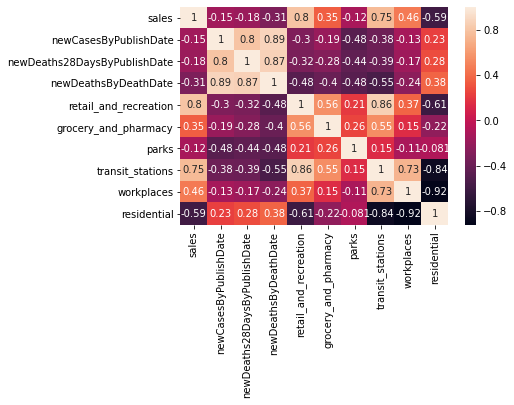

In [10]:
sns.heatmap(sm_df.corr(), annot=True)

## 5. Plot pairwise correlations

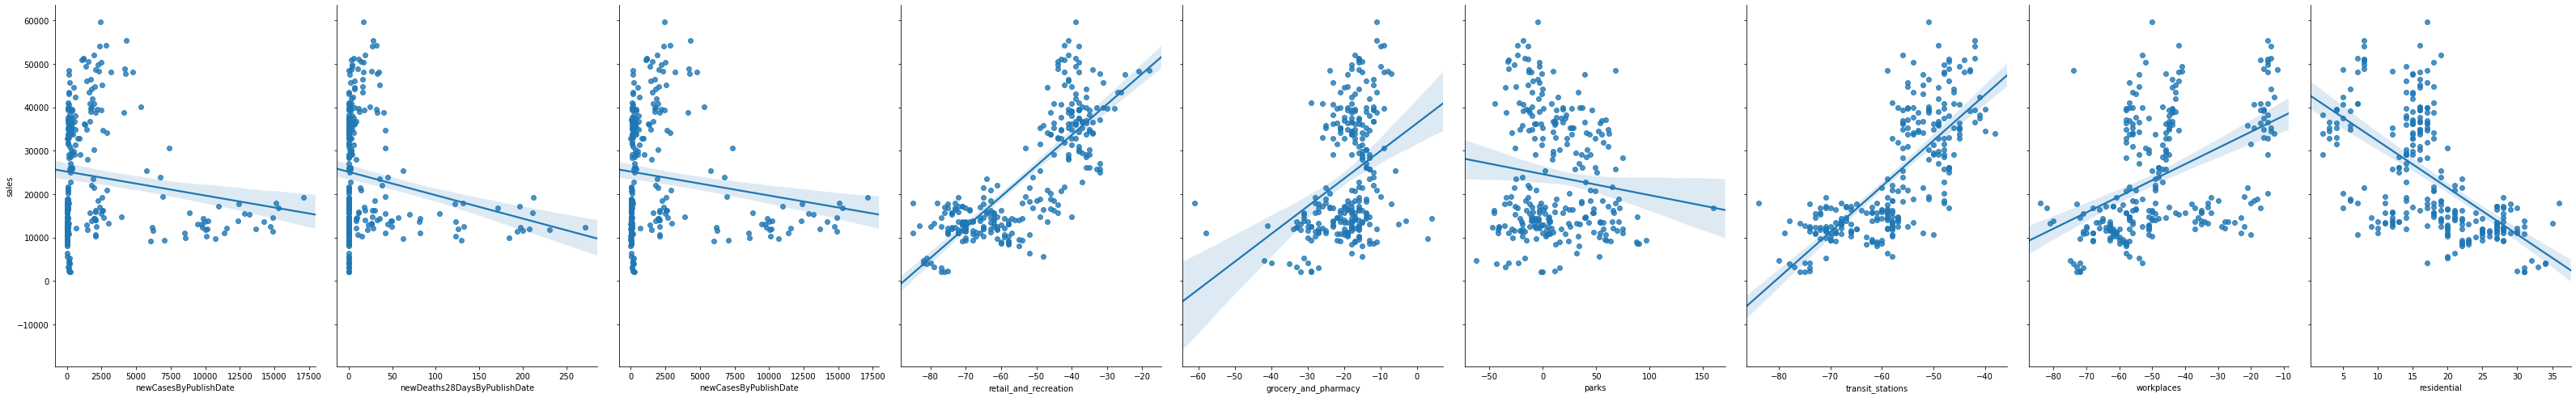

In [12]:
sns.pairplot(sm_df, x_vars=['newCasesByPublishDate', 'newDeaths28DaysByPublishDate','newCasesByPublishDate', 'retail_and_recreation', 'grocery_and_pharmacy', 'parks', 'transit_stations', 'workplaces', 'residential'], y_vars='sales', height=7, aspect=0.7, kind='reg');

## 6. Determine feature importance

<AxesSubplot:>

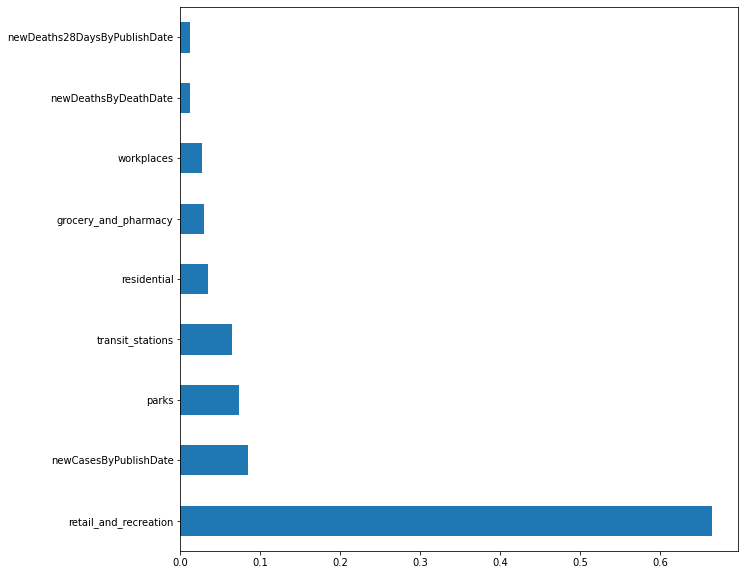

In [14]:
from sklearn.ensemble import RandomForestRegressor
# Setting X and y variables, remove sales from the independent variable set
X = sm_df.loc[:, (sm_df.columns != 'sales')&(sm_df.columns != 'date')]
y = sm_df['sales']
# Split into 80 / 20 training and test set
X_train = X[:int(X.shape[0]*.8)]
X_test = X[int(X.shape[0]*.8):]
y_train = y[:int(X.shape[0]*.8)]
y_test = y[int(X.shape[0]*.8):]
# Building Random Forest model
model = RandomForestRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
# Visualizing Feature Importance
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

## 6. Prediction - Random Forrest Regressor

In [15]:
y_pred = model.predict(X_test)
# TODO: we can try to improve the numbers by normalising sales / covid numbers onto the same scale
#y_pred = output_scaler.inverse_transform(y_pred.reshape(-1, 1))
#y_test = output_scaler.inverse_transform(np.array(y_test).reshape(-1, 1))

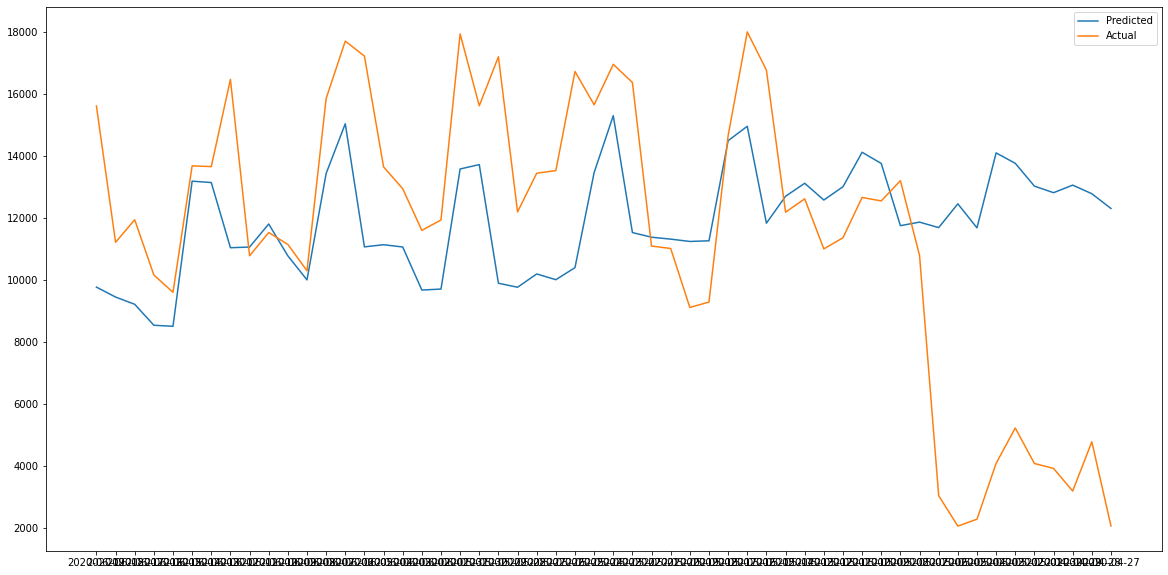

In [16]:
plt.figure(figsize=(20, 10))
plt.plot(sales_df['date'][int(int(sales_df.shape[0]*.8)):], y_pred, label = 'Predicted')
plt.plot(sales_df['date'][int(int(sales_df.shape[0]*.8)):], y_test, label = 'Actual')
plt.legend()

## 7. Evaluate Model - Loss Function

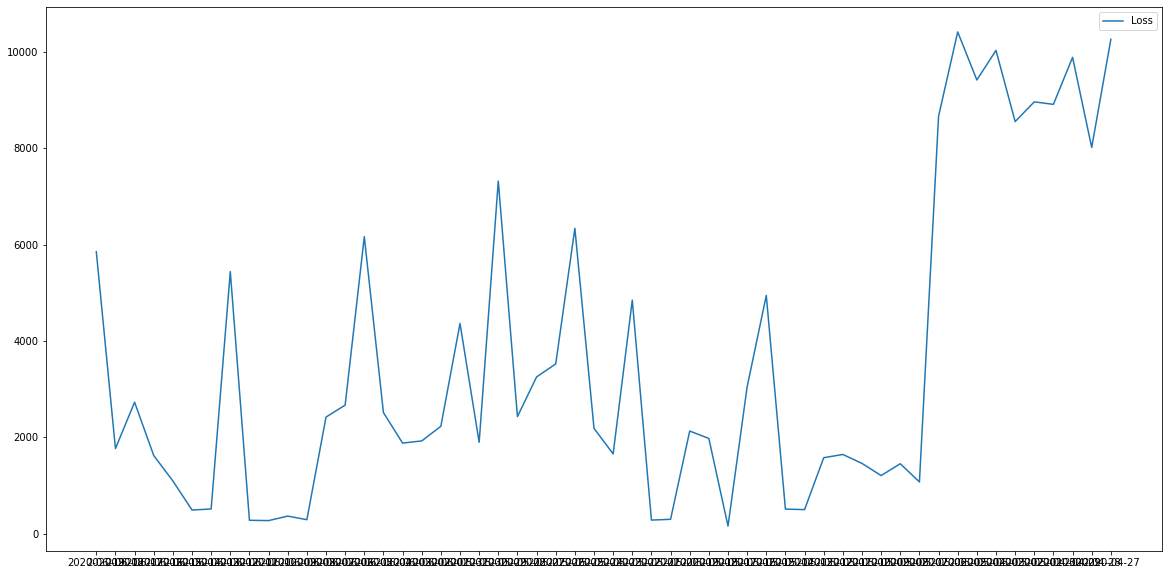

In [17]:
plt.figure(figsize=(20, 10))
# Loss = y_test - y_pred
plt.plot(sales_df['date'][int(int(sales_df.shape[0]*.8)):], np.sqrt((y_test-y_pred)**2), label = 'Loss')
plt.legend()

In [18]:
print('Primary metrics:')
print('root_mean_squared_error (RMSE) - :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2:', metrics.r2_score(y_test, y_pred))
print('mean_squared_error(MSE):', metrics.mean_squared_error(y_test, y_pred))
print('mean_absolute_error (MAE):', metrics.mean_absolute_error(y_test, y_pred))


print('Secondary metrics:')     
print('explained_variance:', metrics.explained_variance_score(y_test, y_pred))
print('max_error:', metrics.max_error(y_test, y_pred))
print('mean_squared_log_error:', metrics.mean_squared_log_error(y_test, y_pred))
print('mean_poisson_deviance:', metrics.mean_poisson_deviance(y_test, y_pred))
print('mean_gamma_deviance:', metrics.mean_gamma_deviance(y_test, y_pred))


Primary metrics:
root_mean_squared_error (RMSE) - : 4814.978512657867
r2: -0.12745140137692745
mean_squared_error(MSE): 23184018.077356964
mean_absolute_error (MAE): 3587.555001851852
Secondary metrics:
explained_variance: -0.12149840947530066
max_error: 10408.45089999999
mean_squared_log_error: 0.39554080515337514
mean_poisson_deviance: 2387.2828228550457
mean_gamma_deviance: 0.27694755946809624


### Resources
- [UK Covid Download](https://coronavirus.data.gov.uk/details/download) - limited to 5 metrics only, hard to automate, not fit for purpose
- [UK Covid API](https://coronavirus.data.gov.uk/details/developers-guide) - JSON API (maybe richer than SDK below)
- [UK Covid Python SDK](https://publichealthengland.github.io/coronavirus-dashboard-api-python-sdk) - Python SDK wrapper around JSON API
- [Interactive Map](https://coronavirus.data.gov.uk/details/interactive-map) - could be potentially used for inspiration for visualisation
- [Area Code Lookup](https://data.gov.uk/dataset/7ec10db7-c8f4-4a40-8d82-8921935b4865/national-statistics-postcode-lookup-uk) - listing of UK Office of National Statistics area codes
- [ONS Area Codes](https://data.gov.uk/dataset/7ec10db7-c8f4-4a40-8d82-8921935b4865/national-statistics-postcode-lookup-uk) - listing of UK Office of National Statistics area codes